In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('cc.csv',names=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,0.050286,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,0.989299,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,-2.772272,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,-0.371514,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,-0.081320,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,0.273067,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,8.821756,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [61]:
plt.rcParams ['figure.figsize']=(15,15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281A7D677B8>,
      dtype=object)

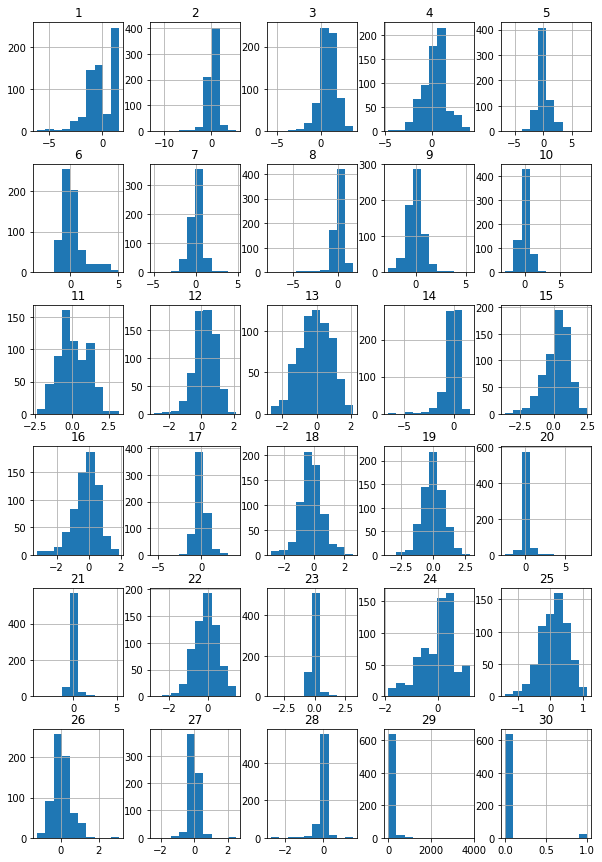

In [57]:
df.hist()

In [59]:
corr=df.corr()

In [64]:
corr

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,1.000000,-0.025170,-0.254344,0.157167,-0.199023,-0.071103,-0.251376,0.124846,-0.180942,-0.181997,...,-0.122996,-0.027771,-0.098697,0.026094,0.312445,-0.045045,-0.114709,0.156073,-0.264156,-0.028333
2,-0.025170,1.000000,0.034007,0.040368,0.111284,-0.075522,0.238931,-0.159036,0.030823,0.248170,...,-0.009946,-0.101632,-0.007687,-0.051073,-0.151001,-0.042866,0.161803,-0.012906,-0.586181,-0.004125
3,-0.254344,0.034007,1.000000,0.025180,-0.140185,-0.210977,-0.021386,-0.092154,0.081086,0.046159,...,0.022848,0.314449,0.140256,0.039368,-0.291937,0.107736,-0.122793,-0.143235,-0.260316,-0.054727
4,0.157167,0.040368,0.025180,1.000000,-0.113285,0.048079,-0.004919,0.107325,-0.126200,-0.027408,...,0.004246,0.087268,-0.000647,0.007617,0.068311,-0.074023,0.129117,0.144743,0.121274,-0.040208
5,-0.199023,0.111284,-0.140185,-0.113285,1.000000,0.217328,0.024702,0.071870,0.010342,-0.000225,...,-0.049581,-0.123879,0.059884,0.038532,-0.044227,-0.186063,-0.122389,-0.093077,-0.318843,0.009588
6,-0.071103,-0.075522,-0.210977,0.048079,0.217328,1.000000,-0.064564,0.116199,0.002068,0.016006,...,0.079927,-0.022090,-0.135339,-0.038680,0.035425,-0.016320,0.016720,-0.037252,0.265907,-0.012700
7,-0.251376,0.238931,-0.021386,-0.004919,0.024702,-0.064564,1.000000,-0.068365,0.059744,0.162424,...,-0.128528,-0.051285,-0.098963,0.005495,-0.269851,-0.019258,-0.123444,-0.359530,0.328842,-0.041347
8,0.124846,-0.159036,-0.092154,0.107325,0.071870,0.116199,-0.068365,1.000000,-0.139339,-0.232986,...,-0.345152,0.199503,0.009226,-0.052302,-0.042189,-0.015120,0.205797,0.280824,-0.023216,-0.005878
9,-0.180942,0.030823,0.081086,-0.126200,0.010342,0.002068,0.059744,-0.139339,1.000000,0.251410,...,-0.022055,0.037252,-0.009483,-0.012012,0.109791,0.055806,0.029630,-0.278874,-0.024757,-0.025259
10,-0.181997,0.248170,0.046159,-0.027408,-0.000225,0.016006,0.162424,-0.232986,0.251410,1.000000,...,-0.154992,-0.021378,-0.026536,-0.003724,0.009691,0.016298,0.061855,-0.309862,-0.096249,-0.026739


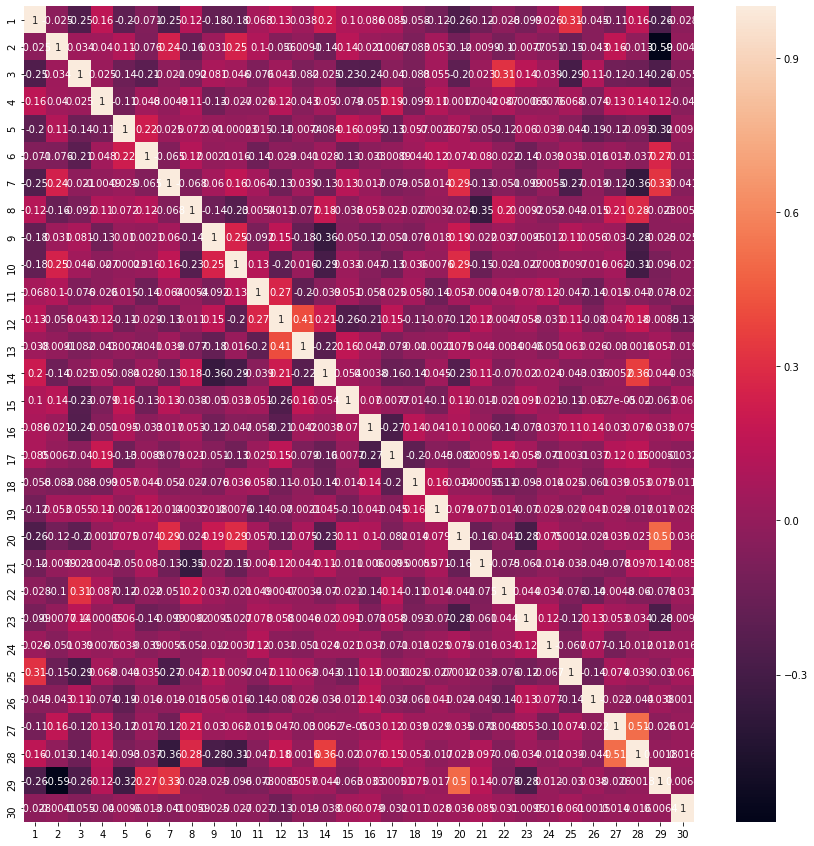

In [62]:
sns.heatmap(corr,annot=True)

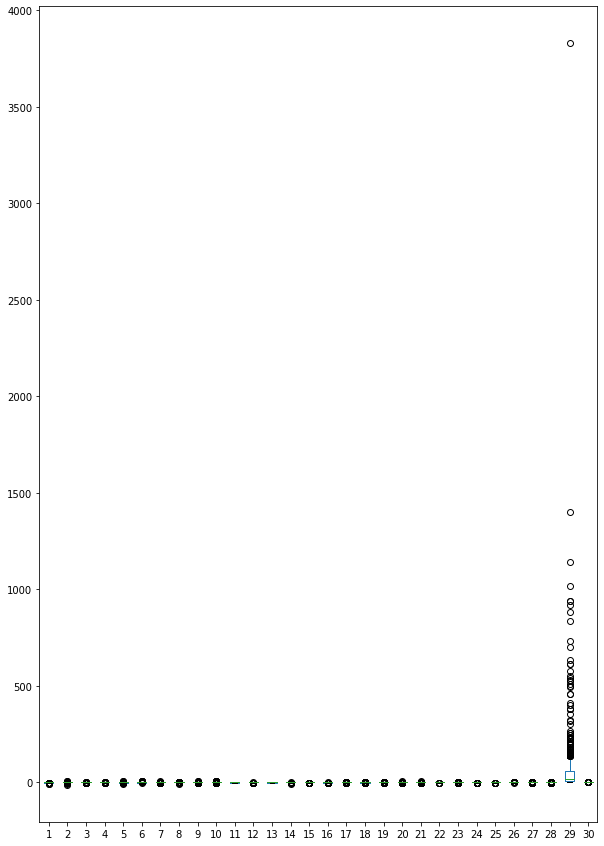

In [6]:
df.plot.box()

In [7]:
df.skew()

1     -1.023190
2     -2.598730
3     -0.895776
4     -0.277100
5      0.612589
6      1.577578
7      0.349123
8     -3.779956
9      1.118661
10     3.811942
11     0.151029
12    -0.484747
13    -0.165198
14    -2.643770
15    -0.666142
16    -0.676734
17    -0.269912
18     0.007315
19    -0.005649
20     4.524971
21     3.162454
22    -0.243161
23    -0.178004
24    -0.619881
25    -0.403746
26     0.903001
27     0.483061
28    -3.248704
29    10.771276
30     4.758490
dtype: float64

In [8]:
df[30].replace('yes',0,inplace=True)

In [9]:
df[30].replace('no',1,inplace=True)

In [10]:
df.shape

(663, 30)

In [11]:
!pip install imblearn

In [12]:
x=df.iloc[:,0:-1]

In [14]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [16]:
smk=SMOTETomek(random_state=42)

In [18]:
x,y=smk.fit_sample(x,y)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
x.shape

(1242, 29)

In [21]:
y.shape

(1242,)

In [26]:
y=y.reshape(-1,1)

In [27]:
lr=LogisticRegression()

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [29]:
lr.fit(xtrain,ytrain)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
lr.score(xtrain,ytrain)

0.7937701396348013

In [31]:
pred=lr.predict(xtest)

In [32]:
accuracy_score(pred,ytest)

0.7877813504823151

In [39]:
cv=cross_val_score(lr,x,y,cv=15,scoring='accuracy')

In [37]:
cv.mean()

0.7728997289972899

In [40]:
dtc=DecisionTreeClassifier()

In [41]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
dtc.score(xtrain,ytrain)

1.0

In [43]:
predtc=dtc.predict(xtest)

In [44]:
accuracy_score(predtc,ytest)

0.887459807073955

In [45]:
cvtc=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')

In [46]:
cvtc.mean()

0.9051296941540845

In [47]:
rfr=RandomForestClassifier(n_estimators=50)

In [48]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rfr.score(xtrain,ytrain)

1.0

In [50]:
pred_r=rfr.predict(xtest)

In [51]:
accuracy_score(pred_r,ytest)

0.9903536977491961

In [52]:
cvr=cross_val_score(rfr,x,y,cv=15,scoring='accuracy')

In [53]:
cvr.mean()

0.9847077042198993

In [55]:
print(classification_report(pred_r,ytest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       164
           1       0.99      0.99      0.99       147

    accuracy                           0.99       311
   macro avg       0.99      0.99      0.99       311
weighted avg       0.99      0.99      0.99       311



In [56]:
confusion_matrix(pred_r,ytest)

array([[163,   1],
       [  2, 145]], dtype=int64)

In [63]:
rfr.feature_importances_

array([0.04232425, 0.03029885, 0.06188884, 0.03732808, 0.02877106,
       0.01611694, 0.02245811, 0.02248891, 0.01324112, 0.02692662,
       0.02389833, 0.04207418, 0.02041397, 0.01922221, 0.02579688,
       0.04377253, 0.01920005, 0.03264871, 0.04721987, 0.02092984,
       0.07798204, 0.03587847, 0.02645592, 0.03807217, 0.06648095,
       0.06097804, 0.02707865, 0.02823944, 0.04181494])

In [65]:
credit_model=pickle.dumps(cvr)